<a href="https://colab.research.google.com/github/Ruhan-Saad-Dave/Machine-Learning-Projects/blob/main/Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Description:

This program uses an artificial recurent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

LSTM: Can process a sequence of data, has feedback connection. Usefull for sequential data prediction, remembers the information that is important

## Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import datetime
import yfinance as yf
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use("fivethirtyeight")

## Get the stock quote

In [3]:
df = yf.download("AAPL", start="2012-01-01", end="2019-12-17")
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.402627,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.469279,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.607712,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.739512,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.719306,394024400
...,...,...,...,...,...,...
2019-12-10,67.150002,67.517502,66.464996,67.120003,65.143250,90420400
2019-12-11,67.202499,67.775002,67.125000,67.692497,65.698891,78756800
2019-12-12,66.945000,68.139999,66.830002,67.864998,65.866318,137310400


In [4]:
#Getting number of rows and columns in the dataset
df.shape

(2002, 6)

## Visualizing the closing price

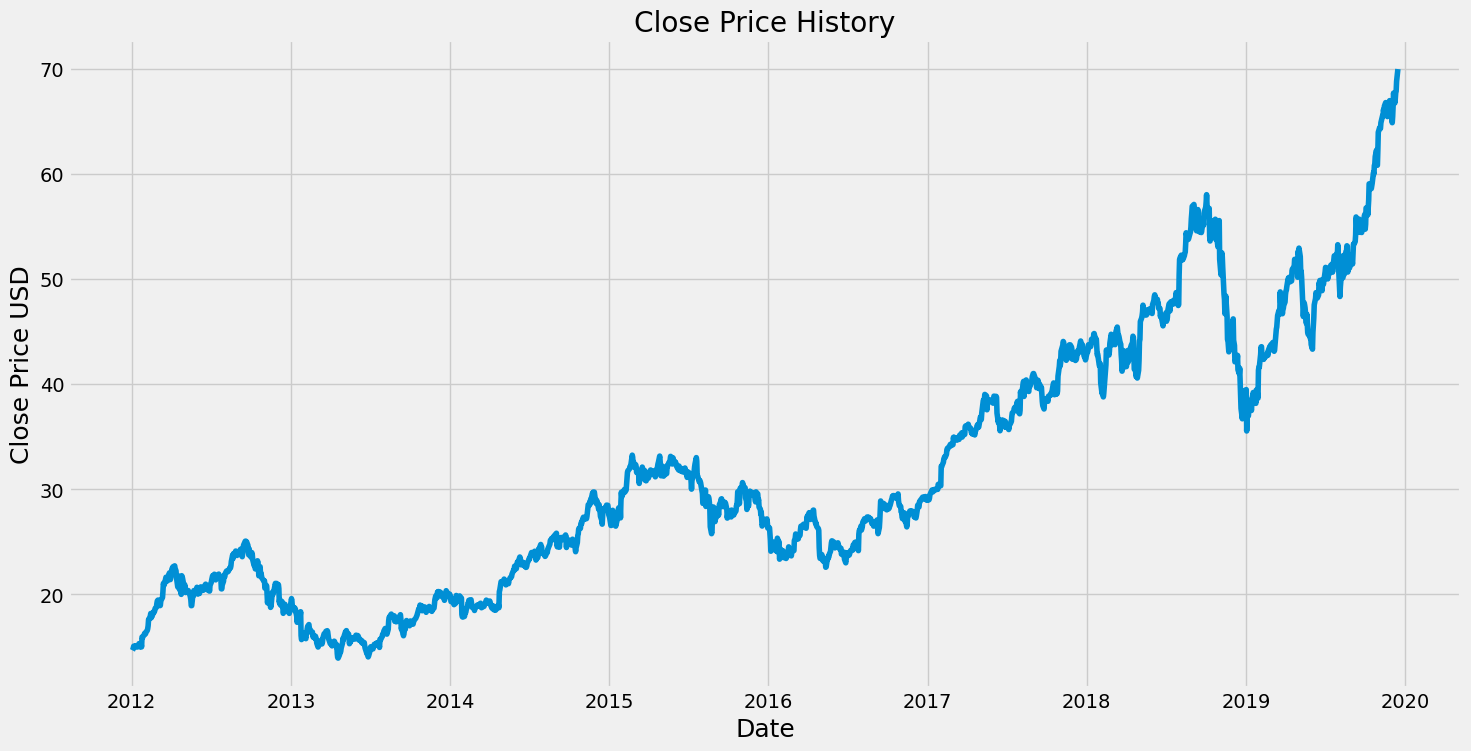

In [5]:
plt.figure(figsize = (16, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize = 18)
plt.ylabel("Close Price USD", fontsize = 18)
plt.show()

## Create a new dataframe with only the 'Close column'

In [6]:
data = df.filter(['Close'])

#convert the dataframe to  numpy array
dataset = data.values

#get the umber of rows to train the model
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1602

## Scaling the data

In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

## Create the scaled training data set

In [9]:
train_data = scaled_data[0: training_data_len, :]

## Split the data into x_train and y_train data sets

In [10]:
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



## Convert the x_train and y_train to numpy arrays

In [12]:
x_train, y_train = np.array(x_train), np.array(y_train)

## Reshape the data

In [18]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #rows, columns
x_train.shape #LSTM model expect 3 dimensional shape

(1542, 60, 1)

## Build the LSTM model

In [19]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Compile the model

In [20]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

## Train the model

In [21]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - loss: 0.0020


## Create the testing data set

In [22]:
#Creating a new array containing scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 60: , :]

#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i - 60: i, 0])

## Convert the data into a numpy array

In [23]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

## Get the model's predicted price values

In [24]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


## Getting the root mean squared error (RMSE)

In [25]:
rmse = np.sqrt(np.mean((predictions - y_test)**2))
rmse

3.0790344222682777

## Plot the data

<ipython-input-26-649ce925b067>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


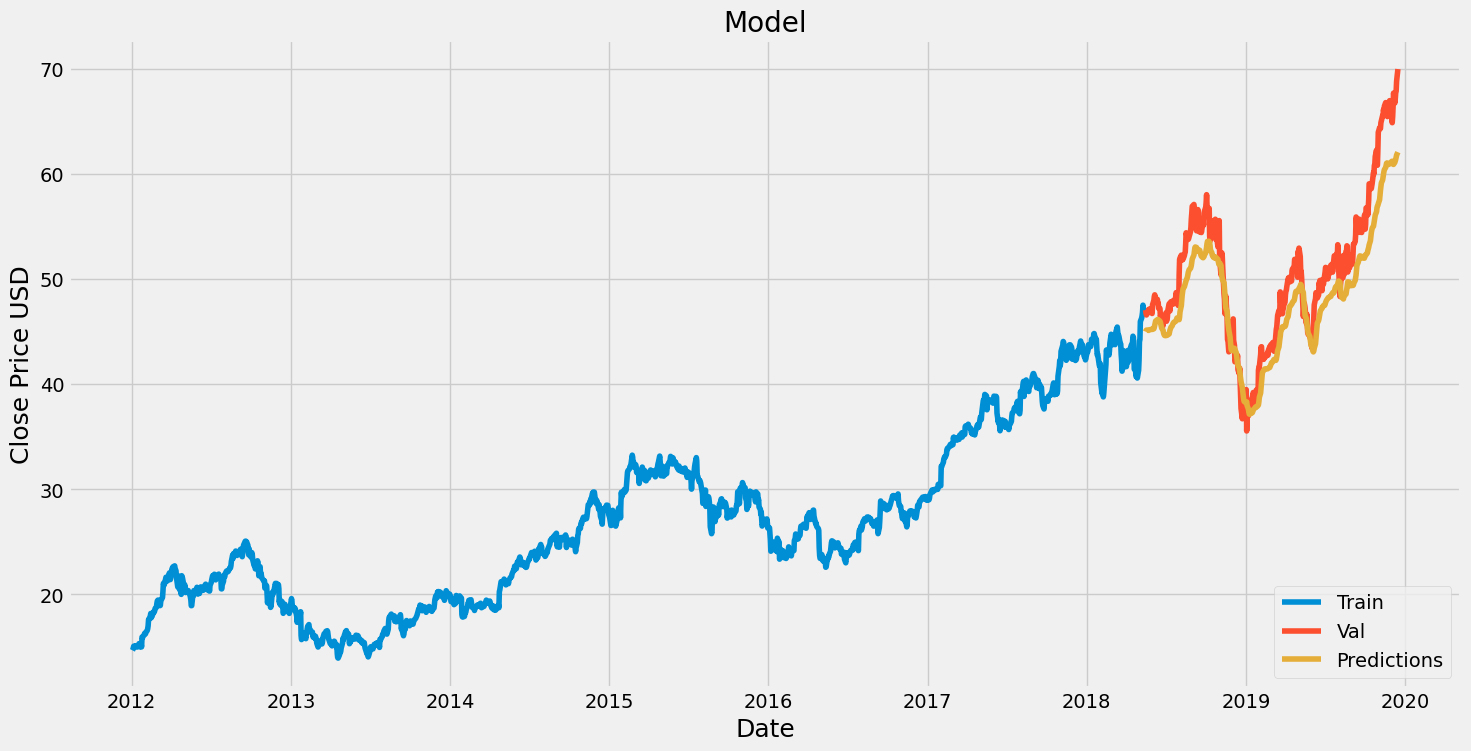

In [26]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize = (16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc = 'lower right')
plt.show()

## Show the valid and predicted prices

In [27]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,44.993454
2018-05-17,46.747501,45.101780
2018-05-18,46.577499,45.141701
2018-05-21,46.907501,45.126255
2018-05-22,46.790001,45.124413
...,...,...
2019-12-10,67.120003,61.226311
2019-12-11,67.692497,61.375160
2019-12-12,67.864998,61.571201


## Get the quote

In [31]:
apple_quote = yf.download("AAPL", start="2012-01-01", end="2019-12-17")


#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test dataset to numpy array
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[*********************100%%**********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
[[62.47284]]


## Checking the difference between predicted and real value

In [33]:
apple_quote2 = yf.download("AAPL", start="2019-12-17", end="2019-12-18")
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2019-12-17    70.102501
Name: Close, dtype: float64
